In [973]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [1056]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 250)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8


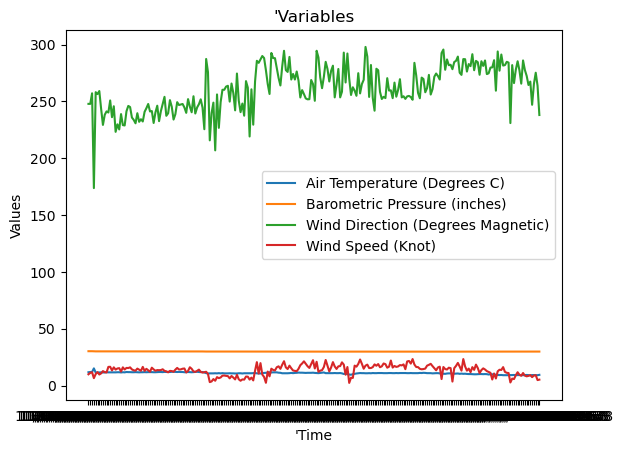

In [1251]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [1252]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']

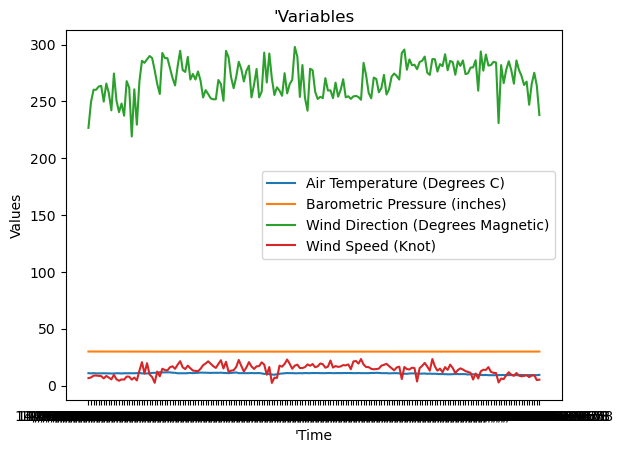

In [1293]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [1294]:
df2['SensorTimestamp']


72     14/08/2015 00:02:20
73     14/08/2015 00:07:21
74     14/08/2015 00:12:22
75     14/08/2015 00:17:22
76     14/08/2015 00:22:22
              ...         
245    14/08/2015 22:14:57
246    14/08/2015 22:19:58
247    14/08/2015 22:24:58
248    14/08/2015 22:29:58
249    14/08/2015 22:34:58
Name: SensorTimestamp, Length: 178, dtype: object

In [1295]:
pd.to_datetime(df2['SensorTimestamp'])

72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: SensorTimestamp, Length: 178, dtype: datetime64[ns]

new variable datetime added

In [1333]:
df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


C:\Users\irivyo\AppData\Local\Temp\ipykernel_4988\3869816751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


In [1334]:
df2['datetime']


72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: datetime, Length: 178, dtype: datetime64[ns]

In [1335]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2015-08-14 22:29:58


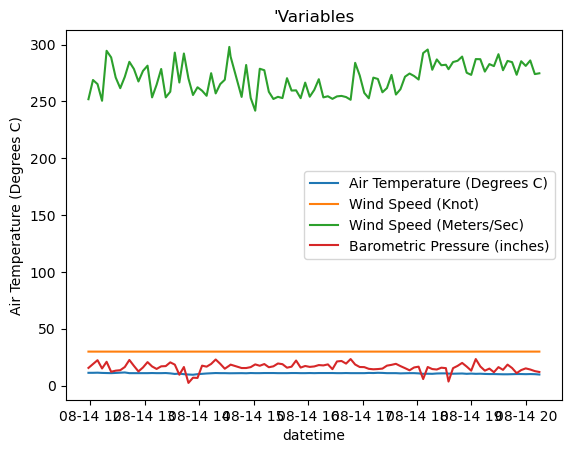

In [1472]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [1473]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2015-08-14 22:29:58


In [1474]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,178.000000,178.000000,178.000000,178.000000
mean,10.550000,29.854820,269.320225,13.747753
std,0.674746,0.020915,15.175070,4.958861
min,9.000000,29.828200,219.100000,2.300000
25%,10.200000,29.843000,258.100000,9.500000
50%,10.800000,29.848900,270.250000,14.750000
75%,11.000000,29.857800,281.475000,17.175000
max,11.700000,29.919800,297.900000,23.300000


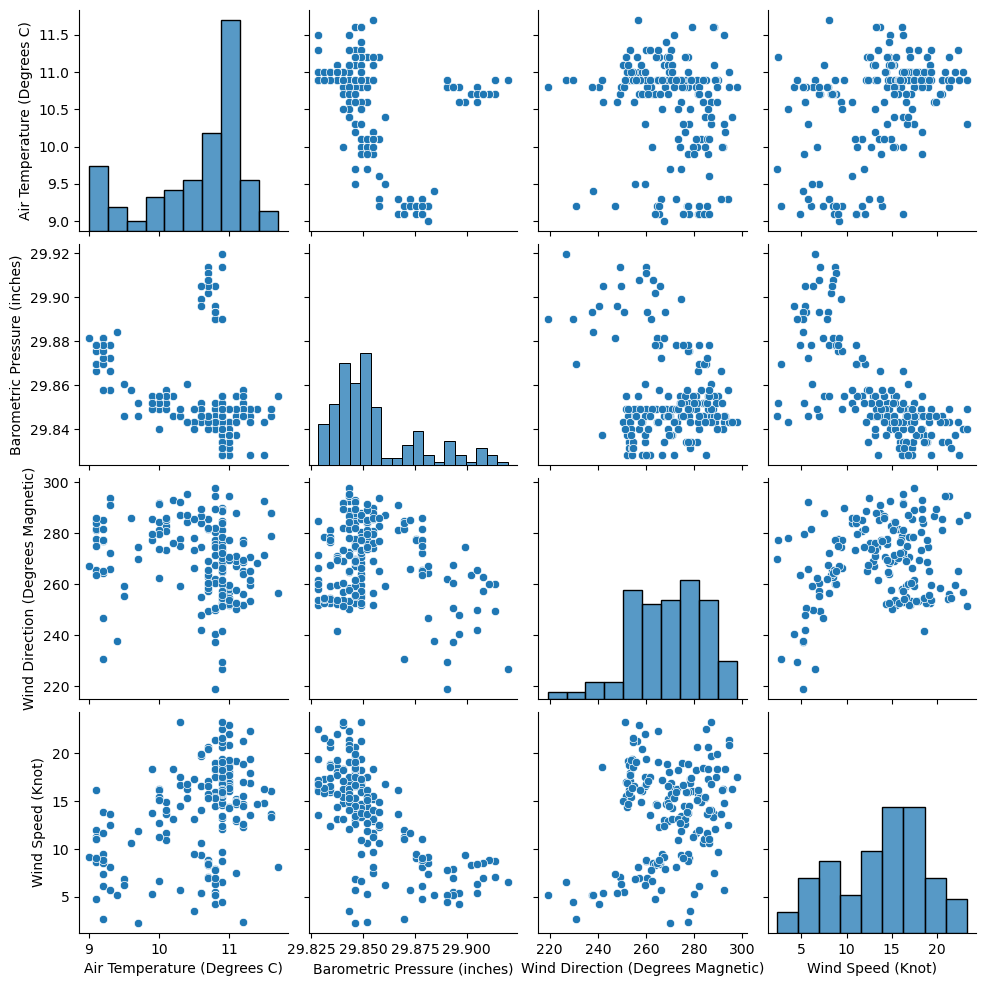

In [1475]:
sns.pairplot(df3)
plt.show()

In [1476]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2015-08-14 22:29:58


In [1477]:
#df3.hist(column ='Air Temperature (Degrees C)')
#plt.show()

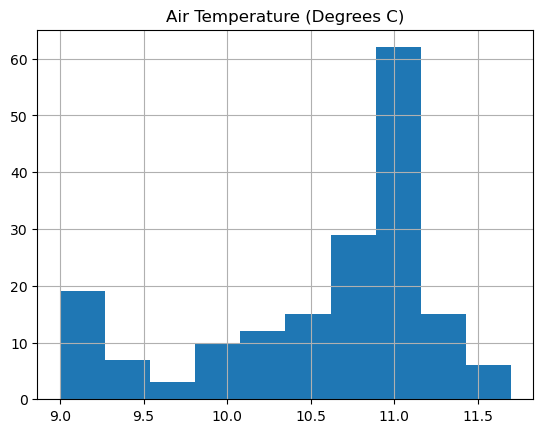

In [1478]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [1479]:
idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=178, freq="MIN")
idx1

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 17:42:33', '2015-11-08 17:43:33',
               '2015-11-08 17:44:33', '2015-11-08 17:45:33',
               '2015-11-08 17:46:33', '2015-11-08 17:47:33',
               '2015-11-08 17:48:33', '2015-11-08 17:49:33',
               '2015-11-08 17:50:33', '2015-11-08 17:51:33'],
              dtype='datetime64[ns]', length=178, freq='T')

In [1480]:
rng1 = np.random.default_rng()
ts1 = pd.DataFrame(data=rng1.poisson(10.55,len(idx1)),index =idx1, columns=['Synthesisd Air Temperature (Degrees C)'])
ts1

,Synthesisd Air Temperature (Degrees C)
2015-11-08 14:54:33,8
2015-11-08 14:55:33,9
2015-11-08 14:56:33,6
2015-11-08 14:57:33,15
2015-11-08 14:58:33,10
...,...
2015-11-08 17:47:33,11
2015-11-08 17:48:33,7
2015-11-08 17:49:33,13
2015-11-08 17:50:33,10


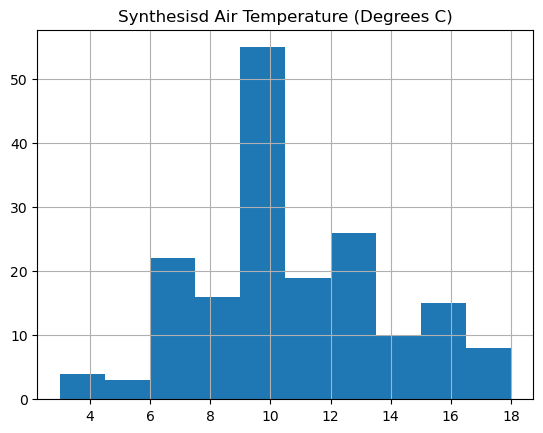

In [1481]:

ts1.hist()
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Air Temperature (Degrees C)'>

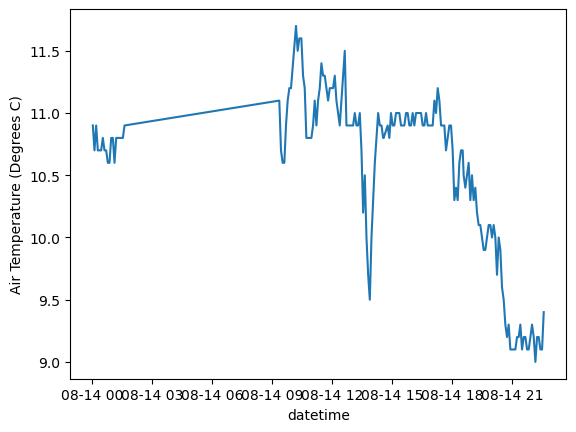

In [1482]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True, label="simulated")

<AxesSubplot:xlabel='Synthesisd Air Temperature (Degrees C)', ylabel='Density'>

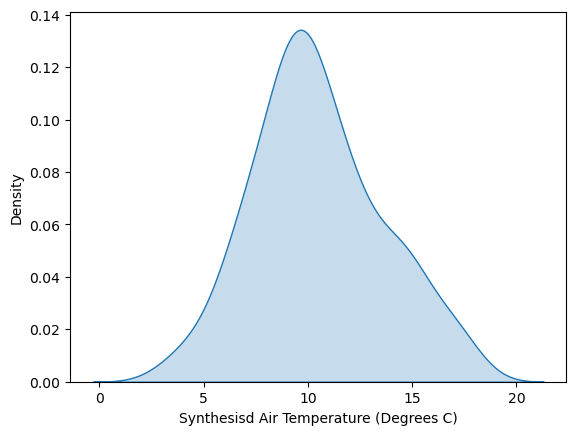

In [1506]:
sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")

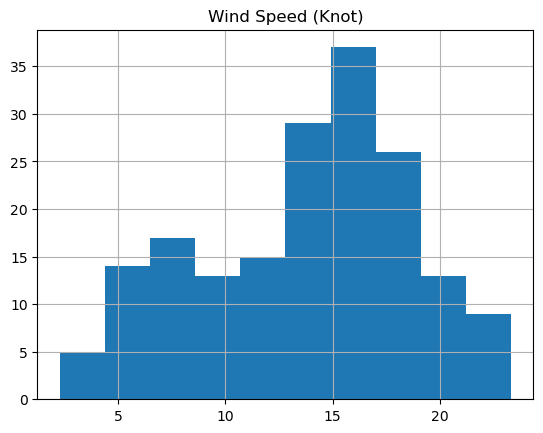

In [1507]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [1508]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx2

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 18:04:33', '2015-11-08 18:05:33',
               '2015-11-08 18:06:33', '2015-11-08 18:07:33',
               '2015-11-08 18:08:33', '2015-11-08 18:09:33',
               '2015-11-08 18:10:33', '2015-11-08 18:11:33',
               '2015-11-08 18:12:33', '2015-11-08 18:13:33'],
              dtype='datetime64[ns]', length=200, freq='T')

In [1509]:
rng2 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
ts2 = pd.DataFrame(data=rng2.weibull(200,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts2

,Synthesised Wind Speed (Knot)
2015-11-08 14:54:33,0.988760
2015-11-08 14:55:33,1.003921
2015-11-08 14:56:33,0.996577
2015-11-08 14:57:33,0.998579
2015-11-08 14:58:33,1.004320
...,...
2015-11-08 18:09:33,0.999029
2015-11-08 18:10:33,1.000358
2015-11-08 18:11:33,1.000546
2015-11-08 18:12:33,1.005338


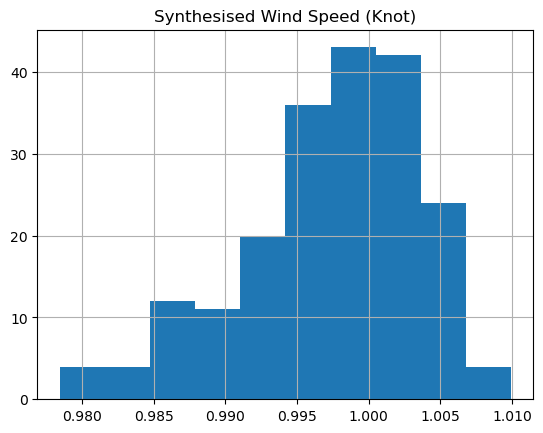

In [1510]:
ts2.hist()
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

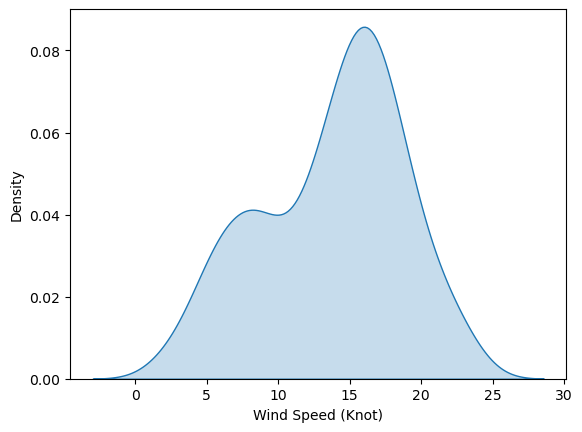

In [1511]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True, label="actual")
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

<AxesSubplot:xlabel='Synthesised Wind Speed (Knot)', ylabel='Density'>

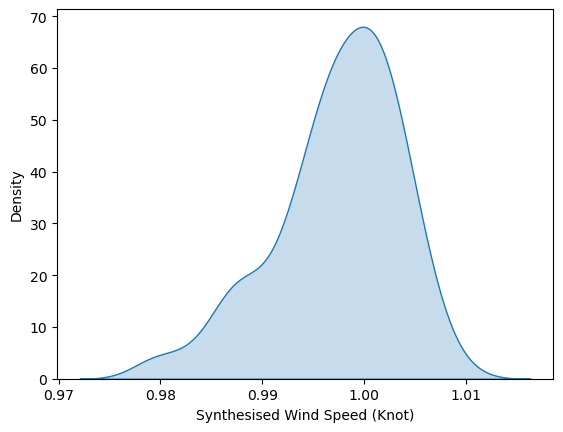

In [1512]:
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [1513]:
result=pd.concat([ts1,ts2])
result

,Synthesisd Air Temperature (Degrees C),Synthesised Wind Speed (Knot)
2015-11-08 14:54:33,8.0,NaN
2015-11-08 14:55:33,9.0,NaN
2015-11-08 14:56:33,6.0,NaN
2015-11-08 14:57:33,15.0,NaN
2015-11-08 14:58:33,10.0,NaN
...,...,...
2015-11-08 18:09:33,NaN,0.999029
2015-11-08 18:10:33,NaN,1.000358
2015-11-08 18:11:33,NaN,1.000546
2015-11-08 18:12:33,NaN,1.005338


<AxesSubplot:xlabel='Synthesisd Air Temperature (Degrees C)', ylabel='Density'>

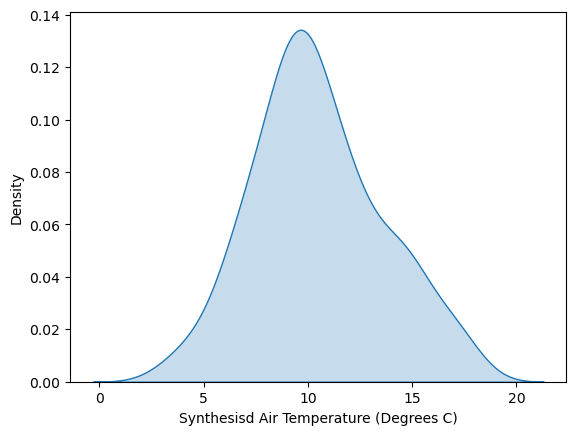

In [1514]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

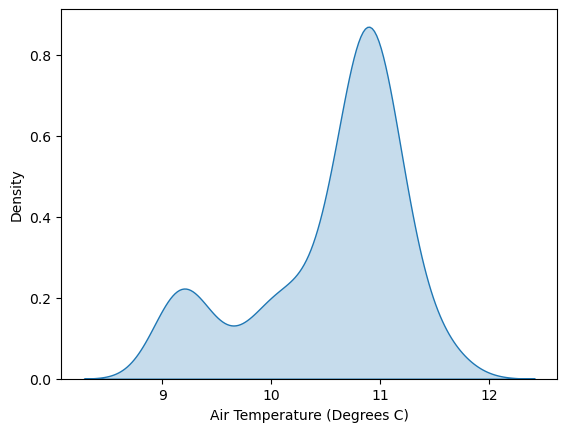

In [1515]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

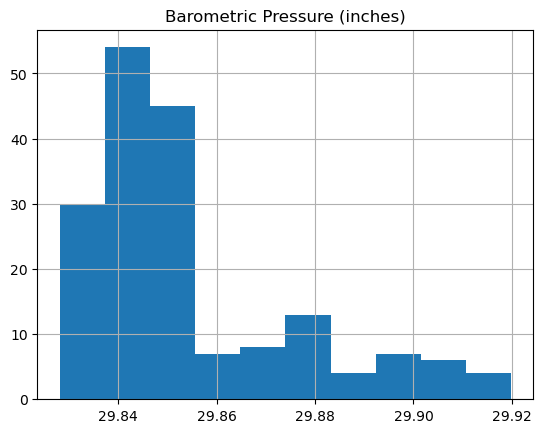

In [1530]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [1531]:
#idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx1

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 18:04:33', '2015-11-08 18:05:33',
               '2015-11-08 18:06:33', '2015-11-08 18:07:33',
               '2015-11-08 18:08:33', '2015-11-08 18:09:33',
               '2015-11-08 18:10:33', '2015-11-08 18:11:33',
               '2015-11-08 18:12:33', '2015-11-08 18:13:33'],
              dtype='datetime64[ns]', length=200, freq='T')

In [1532]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
ts1

,Synthesisd Air Temperature (Degrees C)
2015-11-08 14:54:33,8
2015-11-08 14:55:33,9
2015-11-08 14:56:33,6
2015-11-08 14:57:33,15
2015-11-08 14:58:33,10
...,...
2015-11-08 17:47:33,11
2015-11-08 17:48:33,7
2015-11-08 17:49:33,13
2015-11-08 17:50:33,10


In [1533]:
#ts1.hist('Synthesises Weibull')
plt.show()

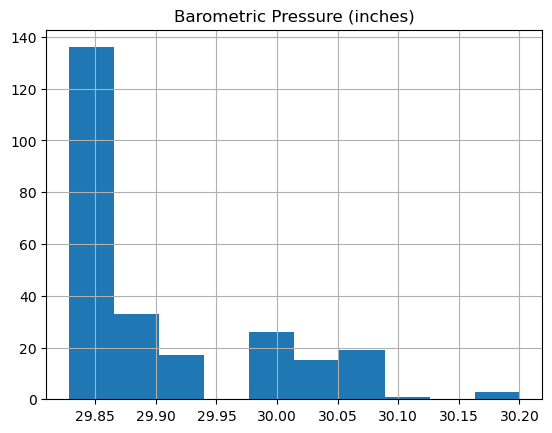

In [1534]:
df1.hist('Barometric Pressure (inches)')
plt.show()

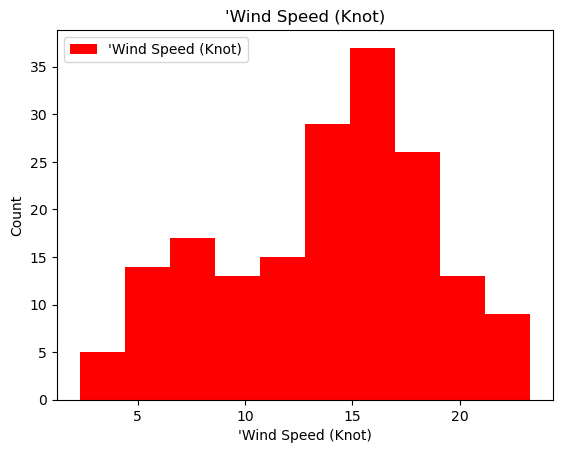

In [1535]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [1536]:
np.random.seed(420)

# Generate random dataset from the Weibull distribution
size = 10000
k = 20
lambda_ = 30
data = np.random.weibull(k, size) * lambda_
data

array([28.58046181, 29.25163681, 28.29634261, ..., 27.2216022 ,
       30.8828393 , 29.67975367])

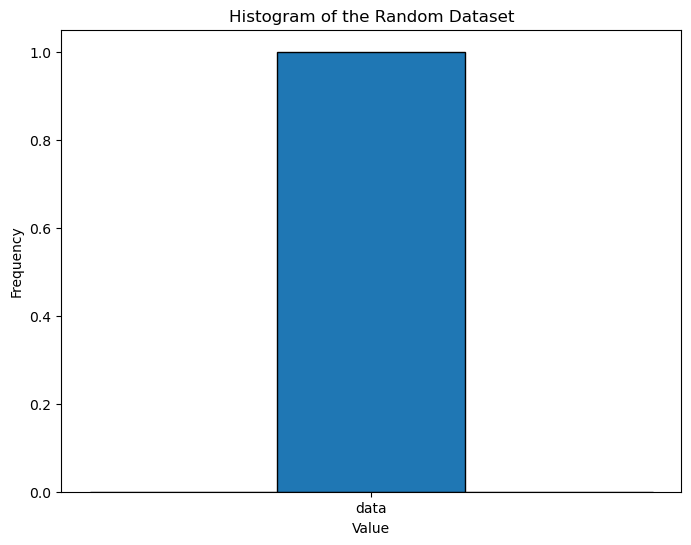

In [1537]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [1538]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [1539]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [1540]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [1541]:
ts


(            Incidents recorded
 2018-12-31                  24
 2019-12-31                  24
 2020-12-31                  16
 2021-12-31                  21
 2022-12-31                  28
 ...                        ...
 2113-12-31                  22
 2114-12-31                  28
 2115-12-31                  20
 2116-12-31                  23
 2117-12-31                  28
 
 [100 rows x 1 columns],)

2.173305848478857 0 26.041286927456817


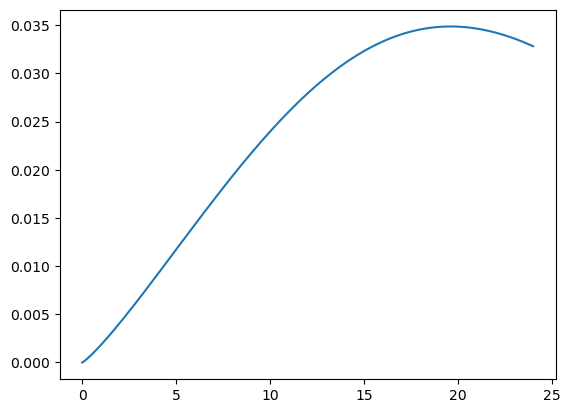

In [1542]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

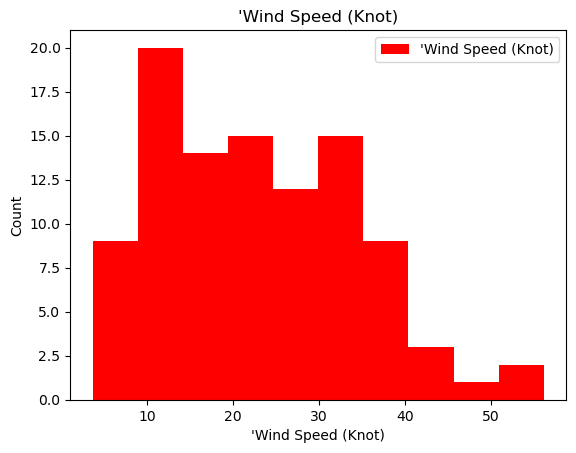

In [1543]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()